In [1]:
#import statsmodels.api as sm
import numpy as np
#from statsmodels.tsa.arima.model import ARIMA
#import pandas as pd
#from statsmodels.tsa import arima_process

from statsmodels.tsa.arima_process import ArmaProcess

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
maparams = np.array([2])
ar = np.r_[1]
ma = np.r_[1, maparams] 
#ma_process = sm.tsa.ArmaProcess(ar, ma, nobs=0)
ma_process = ArmaProcess(ar, ma, nobs=0)

In [3]:
type(ma_process)

statsmodels.tsa.arima_process.ArmaProcess

In [4]:
ma_process

ArmaProcess([1.0], [1.0, 2.0], nobs=0) at 0x2bdd5a89780

In [5]:
[x for x in dir(ma_process) if not x.startswith('__')]

['acf',
 'acovf',
 'ar',
 'arcoefs',
 'arma2ar',
 'arma2ma',
 'arpoly',
 'arroots',
 'from_coeffs',
 'from_estimation',
 'from_roots',
 'generate_sample',
 'impulse_response',
 'invertroots',
 'isinvertible',
 'isstationary',
 'ma',
 'macoefs',
 'mapoly',
 'maroots',
 'nobs',
 'pacf',
 'periodogram']

In [6]:
ma_process.acovf(10)

array([5., 2., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
ma_process.acf(10)

array([1. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

In [8]:
ma_process.mapoly

Polynomial([1., 2.], domain=[-1,  1], window=[-1,  1])

In [9]:
ma_process.arpoly

Polynomial([1.], domain=[-1,  1], window=[-1,  1])

In [10]:
ma_process.maroots, ma_process.arroots

(array([-0.5]), array([], dtype=float64))

In [11]:
ma_process.arpoly

Polynomial([1.], domain=[-1,  1], window=[-1,  1])

In [12]:
ma_process.arroots

array([], dtype=float64)

In [13]:
ma_process.arma2ar(lags=10)

array([   1.,   -2.,    4.,   -8.,   16.,  -32.,   64., -128.,  256.,
       -512.])

In [14]:
type(ma_process.isstationary)

bool

In [15]:
type(ma_process.arma2ar)

method

In [20]:
ma_process.acovf(3)

array([5., 2., 0.])

In [53]:
np.arange(3)

array([0, 1, 2])

Text(0.5, 1.0, 'Theoretical autocovariances')

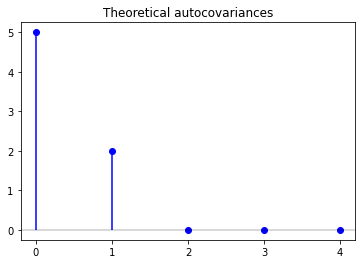

In [64]:
import matplotlib.pyplot as plt

nlags = 5

lags = np.arange(nlags)
acovf_x = ma_process.acovf(nlags)

fig, ax = plt.subplots()
ax.vlines(lags, [0], acovf_x, color='b')
ax.scatter(lags, acovf_x, marker='o', c='b')
ax.axhline(color='black', linewidth=.3)
ax.set_xticks(lags)
ax.set_title('Theoretical autocovariances')

''

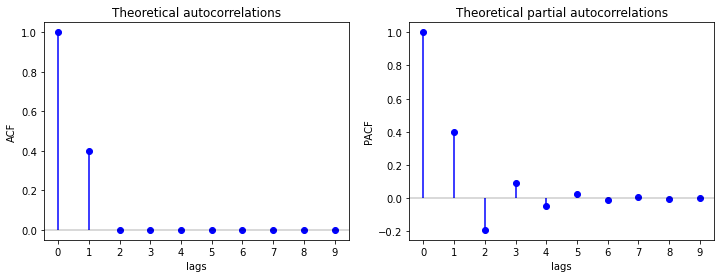

In [71]:
nlags = 10

lags = np.arange(nlags)
acf_x = ma_process.acf(nlags)
pacf_x = ma_process.pacf(nlags)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax1.vlines(lags, [0], acf_x, color='b')
ax1.scatter(lags, acf_x, marker='o', c='b')
ax1.axhline(color='black', linewidth=.3)
ax1.set_xticks(lags)
ax1.set_xlabel('lags')
ax1.set_ylabel('ACF')
ax1.set_title('Theoretical autocorrelations')

ax2.vlines(lags, [0], pacf_x, color='b')
ax2.scatter(lags, pacf_x, marker='o', c='b')
ax2.axhline(color='black', linewidth=.3)
ax2.set_xticks(lags)
ax2.set_xlabel('lags')
ax2.set_ylabel('PACF')
ax2.set_title('Theoretical partial autocorrelations')
;

In [7]:
type(ARIMA)

type

In [3]:
ar_model = ARIMA

In [5]:
ar_model.acovf()

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
url = 'https://raw.githubusercontent.com/jlevendi/Time-Series-Econometrics/master/book%20data%20for%20distribution/CSV_data/MAexamples.csv'
df = pd.read_csv(filepath_or_buffer=url, sep='\t', index_col=0)
data = df['X'].values

In [22]:
data

array([-0.49677348,  0.57997056,  0.47650595, ..., -0.92384487,
       -1.00005374, -0.59472139])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -4230.101
Date:                Fri, 04 Feb 2022   AIC                           8464.202
Time:                        18:37:38   BIC                           8476.214
Sample:                             0   HQIC                          8468.523
                               - 3000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5120      0.016     32.260      0.000       0.481       0.543
sigma2         0.9822      0.025     38.792      0.000       0.933       1.032
Ljung-Box (L1) (Q):                   0.77   Jarque-

In [3]:
np.random.seed(12345)

In [8]:
maparams = np.array([2])
ar = np.r_[1]
ma = np.r_[1, maparams] # add zero-lag
arma_process = sm.tsa.ArmaProcess(ar, ma)

arma_process.isstationary

True

In [9]:
arma_process.isinvertible

False

In [10]:
arma_process = sm.tsa.ArmaProcess.from_coeffs(.4, maparams)
arma_process.arroots

array([2.5])

In [13]:
arma_process.acovf(5)

array([7.85714286, 5.14285714, 2.05714286, 0.82285714, 0.32914286])